<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Aula_1_Explora%C3%A7%C3%A3o_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [67]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

# Carregar os CSVs

In [68]:
import pandas as pd
import plotly.express as px

In [69]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_sellers_dataset.csv')

# Exploração dataset Clientes

In [70]:
# Tamanho do dataset
df_clientes.shape

(99441, 5)

In [71]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [72]:
# Quantas cidades diferentes temos no dataset
print(f'Número de cidades diferentes: {len(df_clientes.customer_city.unique())}')

Número de cidades diferentes: 4119


In [73]:
# Quantos estados diferentes temos no dataset
print(f'Número de estados diferentes: {len(df_clientes.customer_state.unique())}')

Número de estados diferentes: 27


In [74]:
# Total de clientes
print(f'Número de clientes diferentes: {len(df_clientes.customer_unique_id.unique())}')

Número de clientes diferentes: 96096


In [75]:
# Total de clientes por cidade
data = df_clientes.groupby('customer_unique_id').first().customer_city.value_counts().reset_index()
data

,index,customer_city
0,sao paulo,14971
1,rio de janeiro,6611
2,belo horizonte,2671
3,brasilia,2066
4,curitiba,1462
...,...,...
4113,nantes,1
4114,cidelandia,1
4115,teresina de goias,1
4116,cedro do abaete,1


In [76]:
data.customer_city.sum()

96096

In [77]:
data = data.head(7)
data

,index,customer_city
0,sao paulo,14971
1,rio de janeiro,6611
2,belo horizonte,2671
3,brasilia,2066
4,curitiba,1462
5,campinas,1397
6,porto alegre,1326


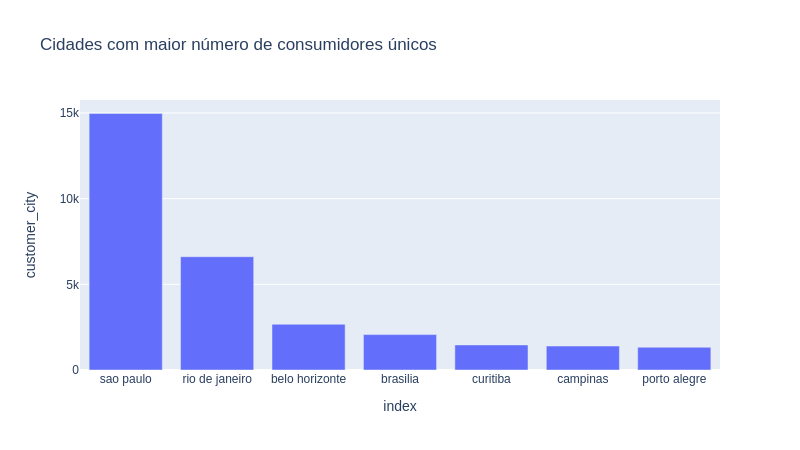

In [78]:
fig = px.bar(data, x='index', y='customer_city', title='Cidades com maior número de consumidores únicos')
gitly.show(fig)

# Exploração dataset Itens

In [79]:
# Tamanho do dataset
df_compra_itens.shape

(112650, 7)

In [80]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [81]:
# Número de pedidos únicos
print(f'Número de pedidos: {len(df_compra_itens.order_id.unique())}')

Número de pedidos: 98666


In [82]:
# Número de produtos
print(f'Número de produtos: {len(df_compra_itens.product_id.unique())}')

Número de produtos: 32951


In [83]:
# Quantidade de vendedores
print(f'Número de vendedores: {len(df_compra_itens.seller_id.unique())}')

Número de vendedores: 3095


In [84]:
# Preço médio das compras
print(f'Preço médio de todas as compras: R${df_compra_itens.price.mean():.2f}')

Preço médio de todas as compras: R$120.65


In [85]:
# Maiores vendedores
df_vendas = df_compra_itens.groupby(by='seller_id').price.sum().sort_values(ascending=False)
df_vendas

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
                                      ...    
34aefe746cd81b7f3b23253ea28bef39         8.00
702835e4b785b67a084280efca355756         7.60
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
77128dec4bec4878c37ab7d6169d6f26         6.50
cf6f6bc4df3999b9c6440f124fb2f687         3.50
Name: price, Length: 3095, dtype: float64

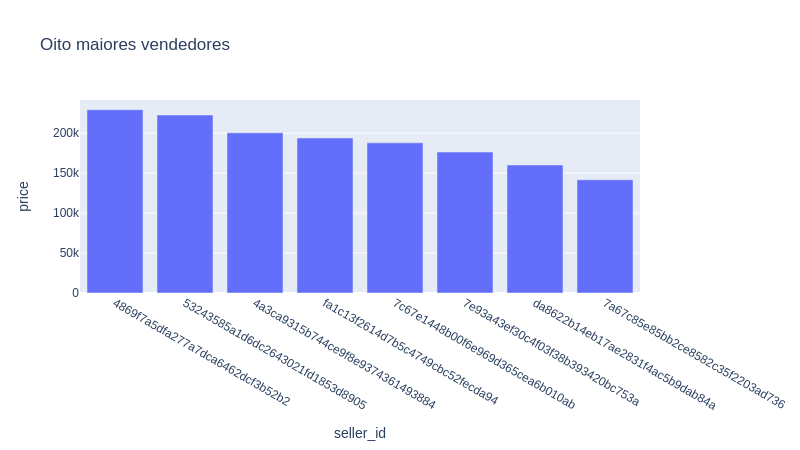

In [86]:
df_mais_vendas = df_vendas.head(8).reset_index()

fig = px.bar(df_mais_vendas, x='seller_id', y='price', title= 'Oito maiores vendedores')
gitly.show(fig)

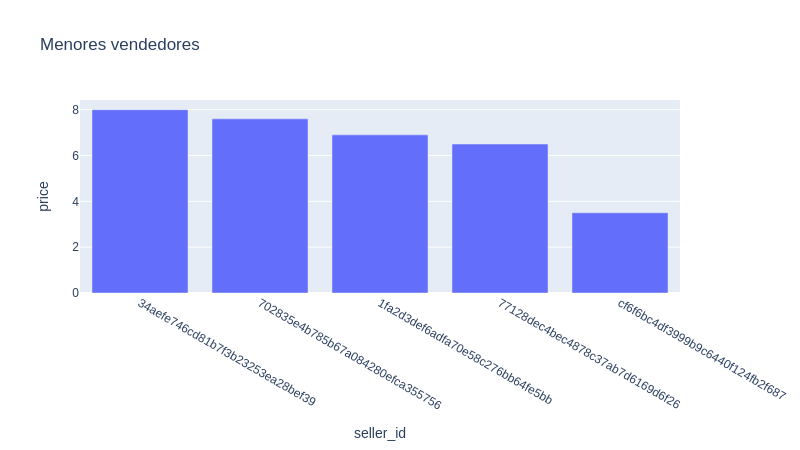

In [87]:
df_menos_vendas = df_vendas.tail().reset_index()

fig = px.bar(df_menos_vendas, x='seller_id', y='price', title= 'Menores vendedores')
gitly.show(fig)

In [88]:
# Preço médio do frete das compras
print(f'Preço médio do frete de todas as compras: R${df_compra_itens.freight_value.mean():.2f}')

Preço médio do frete de todas as compras: R$19.99


In [89]:
# Preço médio total das compras (preço do produto + frete)
preço_total = df_compra_itens.price.mean() + df_compra_itens.freight_value.mean()
print(f'Preço médio total da compra: R${preço_total:.2f}')

Preço médio total da compra: R$140.64


# Exploração dataset Produtos

In [90]:
# Tamanho do dataset
df_produtos.shape

(32951, 9)

In [91]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [92]:
# Número de categorias
print(f'Número de categorias: {len(df_produtos.product_category_name.unique())}')

Número de categorias: 74


In [93]:
# Categorias mais vendidas
df_produtos.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

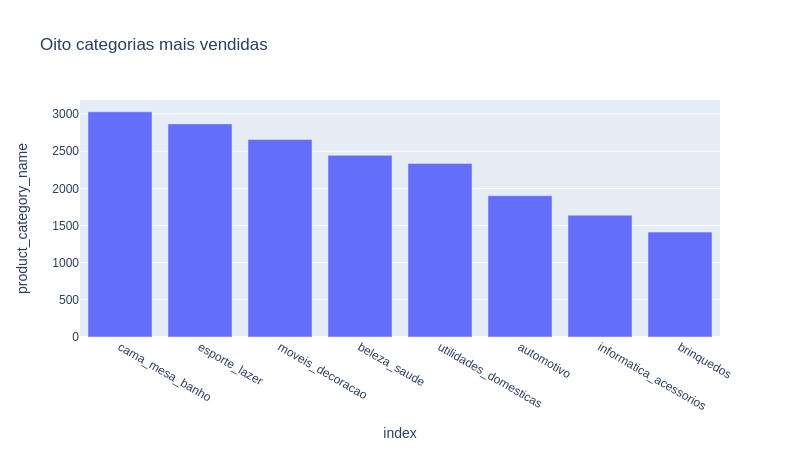

In [94]:
df_prods_mais_vend = df_produtos.product_category_name.value_counts().head(8).reset_index()

fig = px.bar(df_prods_mais_vend, x='index', y='product_category_name', title= 'Oito categorias mais vendidas')
gitly.show(fig)

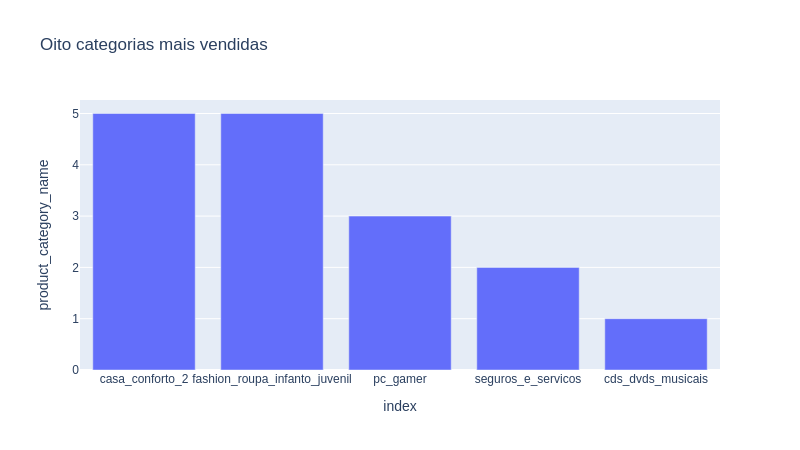

In [95]:
df_prods_menos_vend = df_produtos.product_category_name.value_counts().tail().reset_index()

fig = px.bar(df_prods_menos_vend, x='index', y='product_category_name', title= 'Oito categorias mais vendidas')
gitly.show(fig)

In [96]:
# Peso médio dos produtos
print(f'Peso médio dos produtos: {df_produtos.product_weight_g.mean()/1000:.2f}kg')

Peso médio dos produtos: 2.28kg


In [97]:
# Comprimento médio dos produtos
print(f'Comprimento médio dos produtos: {df_produtos.product_length_cm.mean():.2f}cm')

Comprimento médio dos produtos: 30.82cm


In [98]:
# Altura média dos produtos
print(f'Altura média dos produtos: {df_produtos.product_height_cm.mean():.2f}cm')

Altura média dos produtos: 16.94cm


In [99]:
# Largura médi dos produtos
print(f'Largura média dos produtos: {df_produtos.product_width_cm.mean():.2f}cm')

Largura média dos produtos: 23.20cm


# Exploração dataset Vendedores

In [100]:
# Tamanho do dataset
df_vendedores.shape

(3095, 4)

In [101]:
df_vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [102]:
# Total de cidades dos vendedores
print(f'Total de cidades dos vendedores cadastradas: {len(df_vendedores.seller_city.unique())}')

Total de cidades dos vendedores cadastradas: 611


In [103]:
# Total de estados dos vendedores
print(f'Total de estados dos vendedores cadastradas: {len(df_vendedores.seller_state.unique())}')

Total de estados dos vendedores cadastradas: 23


# Exploração dataset Reviews

In [104]:
# Tamanho do dataset
df_reviews.shape

(100000, 7)

In [105]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [106]:
df_reviews.review_id.value_counts()

4d0e6dd087008d1f992d25ef6e1f619f    3
e44840754f12fad2b8646712121b349a    3
38821b5c496b678cf91acc34892805ad    3
70509c441d994fa03d6c1457930c9024    3
9e25d6e3025e9b9a0fc7f03588d33e2b    3
                                   ..
c26a0e9e8b25b8f35ade5ac0c498933f    1
ad89c6afbdb95a3f145c413530f29a0b    1
dc1c8052c7bde16f4e3605ff571b52fb    1
468746099d2c116413643b9387bd0593    1
9adca0e3720f85d55607311c835c400f    1
Name: review_id, Length: 99173, dtype: int64

In [107]:
df1 = df_reviews.groupby('review_id').first().review_score.value_counts().reset_index()
df1

,index,review_score
0,5,57000
1,4,19062
2,1,11712
3,3,8203
4,2,3196


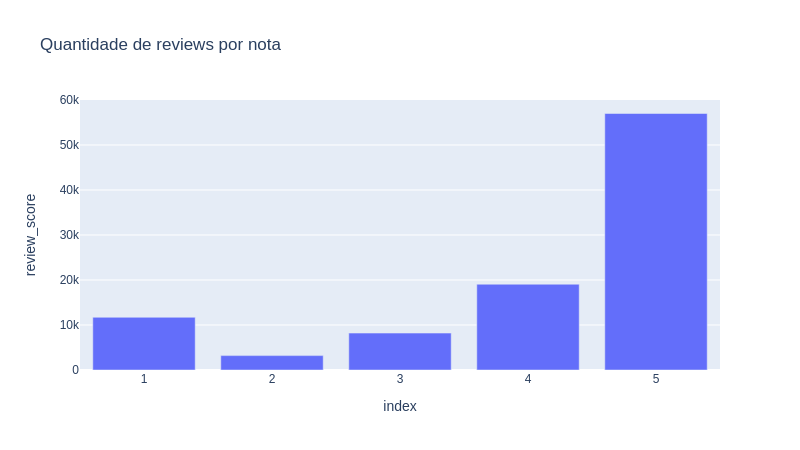

In [108]:
fig = px.bar(df1, x='index', y='review_score', title= 'Quantidade de reviews por nota')
gitly.show(fig)

# Exploração dataset Pagamentos

In [109]:
# Tamanho do dataset
df_compra_pagamentos.shape

(103886, 5)

In [110]:
df_compra_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [111]:
df_parcelas = df_compra_pagamentos.payment_installments.value_counts().reset_index()
df_parcelas

,index,payment_installments
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,10,5328
5,5,5239
6,8,4268
7,6,3920
8,7,1626
9,9,644


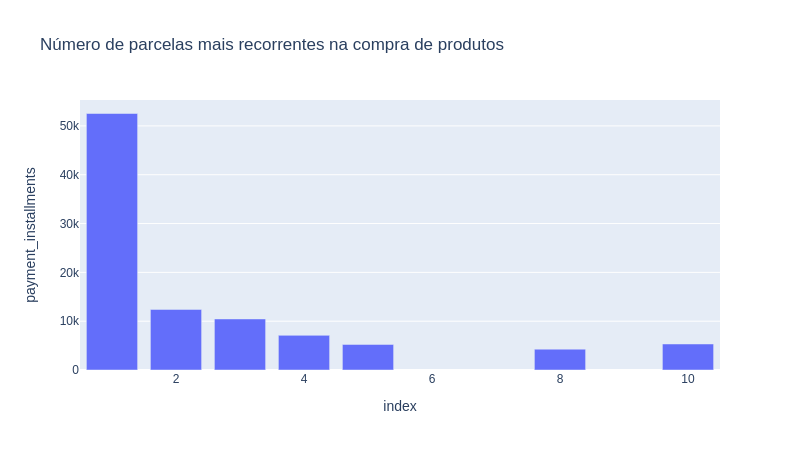

In [112]:
fig = px.bar(df_parcelas.head(7), x='index', y='payment_installments', title= 'Número de parcelas mais recorrentes na compra de produtos')
gitly.show(fig)

In [113]:
# Pagamento médio
print(f'Valor médio de pagamento total: R${df_compra_pagamentos.payment_value.mean():.2f}')

Valor médio de pagamento total: R$154.10


In [114]:
df_metodo_pag = df_compra_pagamentos.payment_type.value_counts().reset_index()
df_metodo_pag

,index,payment_type
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


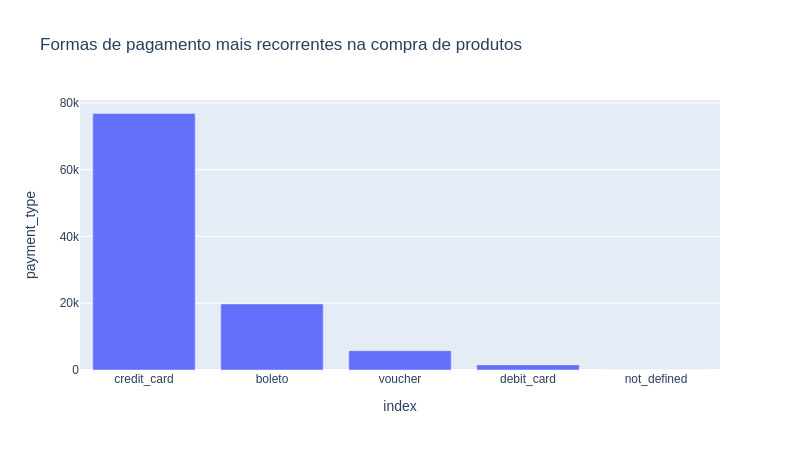

In [115]:
fig = px.bar(df_metodo_pag, x='index', y='payment_type', title= 'Formas de pagamento mais recorrentes na compra de produtos')
gitly.show(fig)

In [116]:
# Parcelas por método de pagamento
df_compra_pagamentos.groupby(['payment_installments','payment_type']).count()

order_id  payment_sequential  payment_value
payment_installments payment_type                                             
0                    credit_card          2                   2              2
1                    boleto           19784               19784          19784
                     credit_card      25455               25455          25455
                     debit_card        1529                1529           1529
                     not_defined          3                   3              3
                     voucher           5775                5775           5775
2                    credit_card      12413               12413          12413
3                    credit_card      10461               10461          10461
4                    credit_card       7098                7098           7098
5                    credit_card       5239                5239           5239
6                    credit_card       3920                3920           3920
7                    credit_card       1626                1626           1626
8                    credit_card       4268                4268           4268
9                    credit_card        644                 644            644
10                   credit_card       5328                5328           5328
11                   credit_card         23                  23             23
12                   credit_card        133                 133            133
13                   credit_card         16                  16             16
14                   credit_card         15                  15             15
15                   credit_card         74                  74             74
16                   credit_card          5                   5              5
17                   credit_card          8                   8              8
18                   credit_card         27                  27             27
20                   credit_card         17                  17             17
21                   credit_card          3                   3              3
22                   credit_card          1                   1              1
23                   credit_card          1                   1              1
24                   credit_card         18                  18             18

# Exploração dataset Compras

In [117]:
# Tamanho do dataset
df_compras.shape

(99441, 8)

In [118]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [119]:
# Tipos e quantidade do status do pedido
df_status = df_compras.order_status.value_counts().reset_index()
df_status

,index,order_status
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


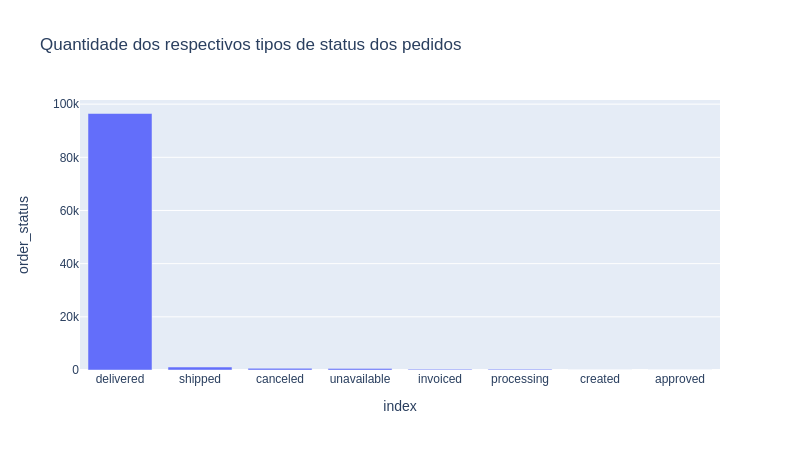

In [120]:
fig = px.bar(df_status, x='index', y='order_status', title= 'Quantidade dos respectivos tipos de status dos pedidos')
gitly.show(fig)

In [121]:
df_compras.order_purchase_timestamp.dtype

dtype('O')

# Exploração dataset Geo

In [122]:
# Tamanho do dataset
df_geo.shape

(1000163, 5)

In [123]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [124]:
df_estados = df_geo.geolocation_state.value_counts().reset_index()
df_estados

,index,geolocation_state
0,SP,404268
1,MG,126336
2,RJ,121169
3,RS,61851
4,PR,57859
5,SC,38328
6,BA,36045
7,GO,20139
8,ES,16748
9,PE,16432


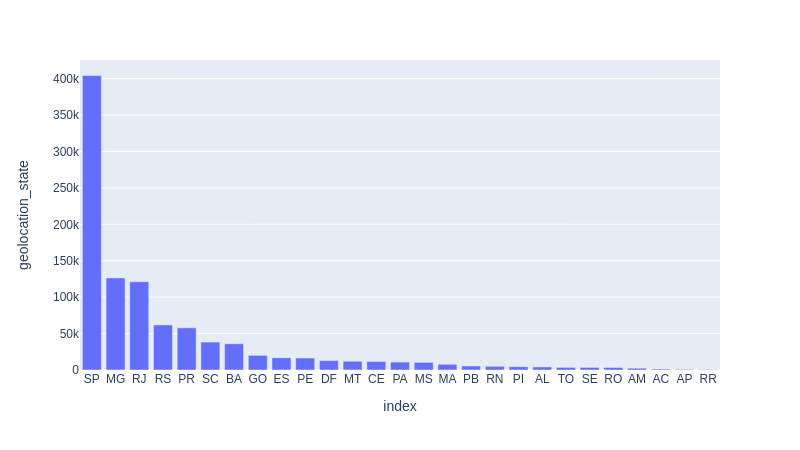

In [125]:
fig = px.bar(df_estados, x = 'index', y = 'geolocation_state')
gitly.show(fig)